# Simple univariate models 

Hypothesis - The stock price itself already contains enough information to perform forecasting *reasonably*  for the next day

In [26]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanAbsoluteError
from sktime.forecasting.arima import AutoARIMA, ARIMA
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import ExpandingWindowSplitter, SlidingWindowSplitter, ForecastingGridSearchCV

In [3]:
# Importing dataset

data = pd.read_csv(
    "../data/assets_m6.csv",
    dtype={"symbol": str, "price": np.float64},
    parse_dates=["date"],
)

hierarchy = pd.read_csv("../data/M6_Universe.csv")

In [10]:
symbol = "ABBV"

stock_price = data[data["symbol"] == symbol]

# print the information on the stock selected
hierarchy[hierarchy["symbol"] == symbol]

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals


In [17]:
# preprocessing 

y = stock_price.set_index("date")["price"]
y = y.asfreq('B')

y = y.ffill(axis = 0)

In [18]:
y.isna().any()

False

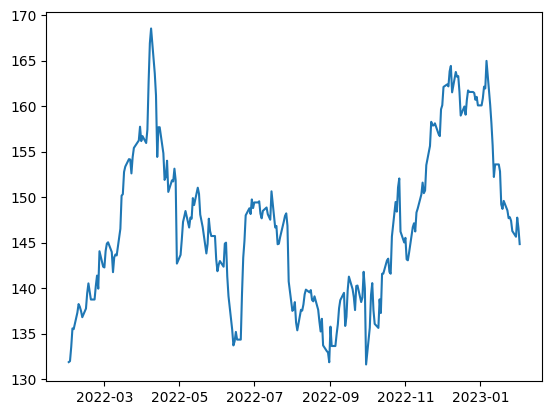

In [19]:
fig = plt.figure
plt.plot(y)

In [33]:
# forecaster = AutoARIMA()
forecaster = NaiveForecaster()
scoring = MeanAbsoluteError()
# cv = ExpandingWindowSplitter(fh = 1, initial_window=100)
cv = SlidingWindowSplitter(fh = 1, initial_window=100, window_length=60)

In [34]:
forecaster = MultiplexForecaster(forecasters = [("auto_arima", AutoARIMA()), ("naive", NaiveForecaster())])

param_grid = {
    "selected_forecaster" : ["auto_arima", "naive"]
}

gscv = ForecastingGridSearchCV(forecaster = forecaster, param_grid=param_grid, scoring=scoring, cv = cv, n_jobs = -1)

In [35]:
gscv.fit(y)

ForecastingGridSearchCV(cv=SlidingWindowSplitter(initial_window=100,
                                                 window_length=60),
                        forecaster=MultiplexForecaster(forecasters=[('auto_arima',
                                                                     AutoARIMA()),
                                                                    ('naive',
                                                                     NaiveForecaster())]),
                        n_jobs=-1,
                        param_grid={'selected_forecaster': ['auto_arima',
                                                            'naive']},
                        scoring=MeanAbsoluteError())

In [36]:
# gscv.cv_results_